<center><h1>Assignment 13(Day 13)</h1></center>

<h3>Question 1:- Firstly, replace all Missing values with relevant figures and remove outliers.</h3>

In [2]:
#Answer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


df = pd.read_csv('Dataset_Day13.csv')  # Creating data frame from the csv.

print(df.info())                       # Printing the information for the dataset.
print(df.head(10))                     # Checking the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6          

In [3]:
print(df.isna().sum() + df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<b>The dataset contains no missing values.</b>

In [4]:
# Descriptive statistics for each columns.

statistics = df.describe()
print(statistics)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<Axes: >

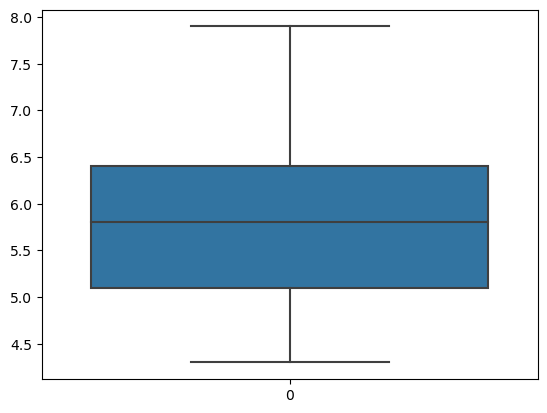

In [5]:
display(sns.boxplot(df["SepalLengthCm"]))      # Before Outlier Removal.

<Axes: >

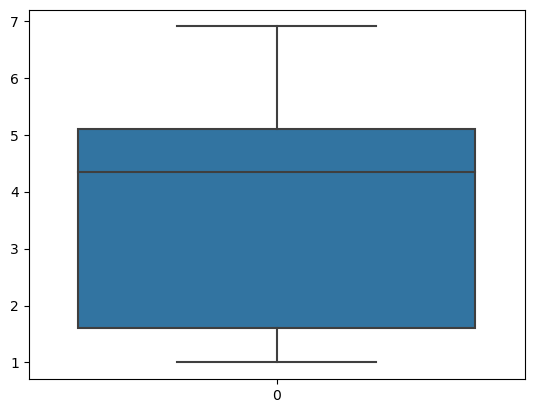

In [6]:
display(sns.boxplot(df["PetalLengthCm"]))      # Before Outlier Removal.

<Axes: >

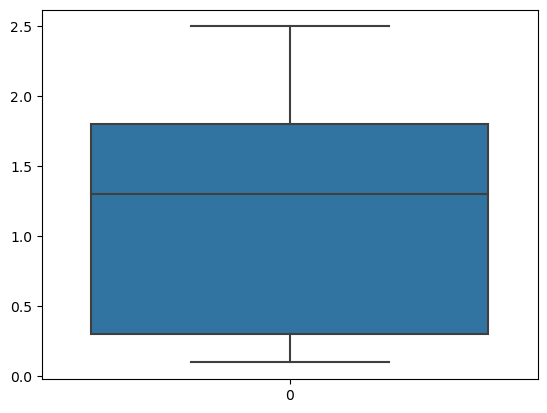

In [7]:
display(sns.boxplot(df["PetalWidthCm"]))      # Before Outlier Removal.

<b> NO OUTLIERS IN 'SEPAL LENGTH','PETAL LENGTH' AND 'PETAL WIDTH'  COLUMN </b>

<Axes: >

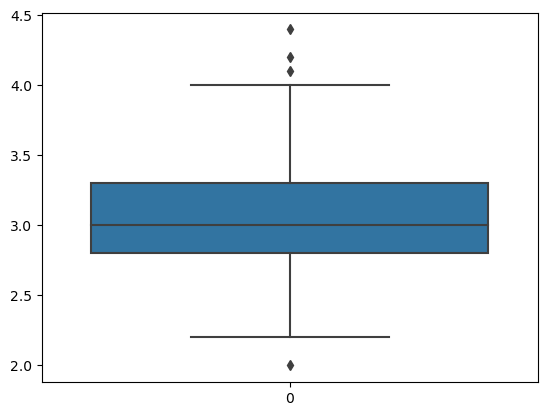

In [8]:
display(sns.boxplot(df["SepalWidthCm"]))      # Before Outlier Removal.

<b> REMOVING THE OUTLIERS PRESENT IN THE 'SEPAL WIDTH' COLUMN </b>

In [9]:
# Removing the outliers from the 'SepalWidthCm' column

Q1 = df[['SepalWidthCm']].quantile(0.25)
Q3 = df[['SepalWidthCm']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers from the DataFrame
df_new = df[(df['SepalWidthCm'] >= lower_bound['SepalWidthCm']) & (df['SepalWidthCm'] <= upper_bound['SepalWidthCm'])]

<Axes: >

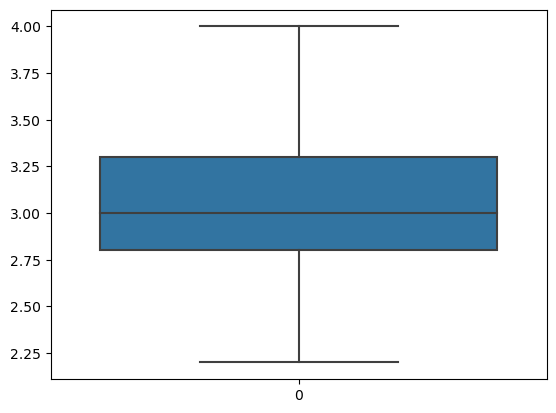

In [10]:
display(sns.boxplot(df_new['SepalWidthCm']))         # After Outlier Removal.

In [11]:
a = df['Id'].count() - df_new['Id'].count()
print(f'Removed {a} rows as outliers from the dataframe.')

Removed 4 rows as outliers from the dataframe.


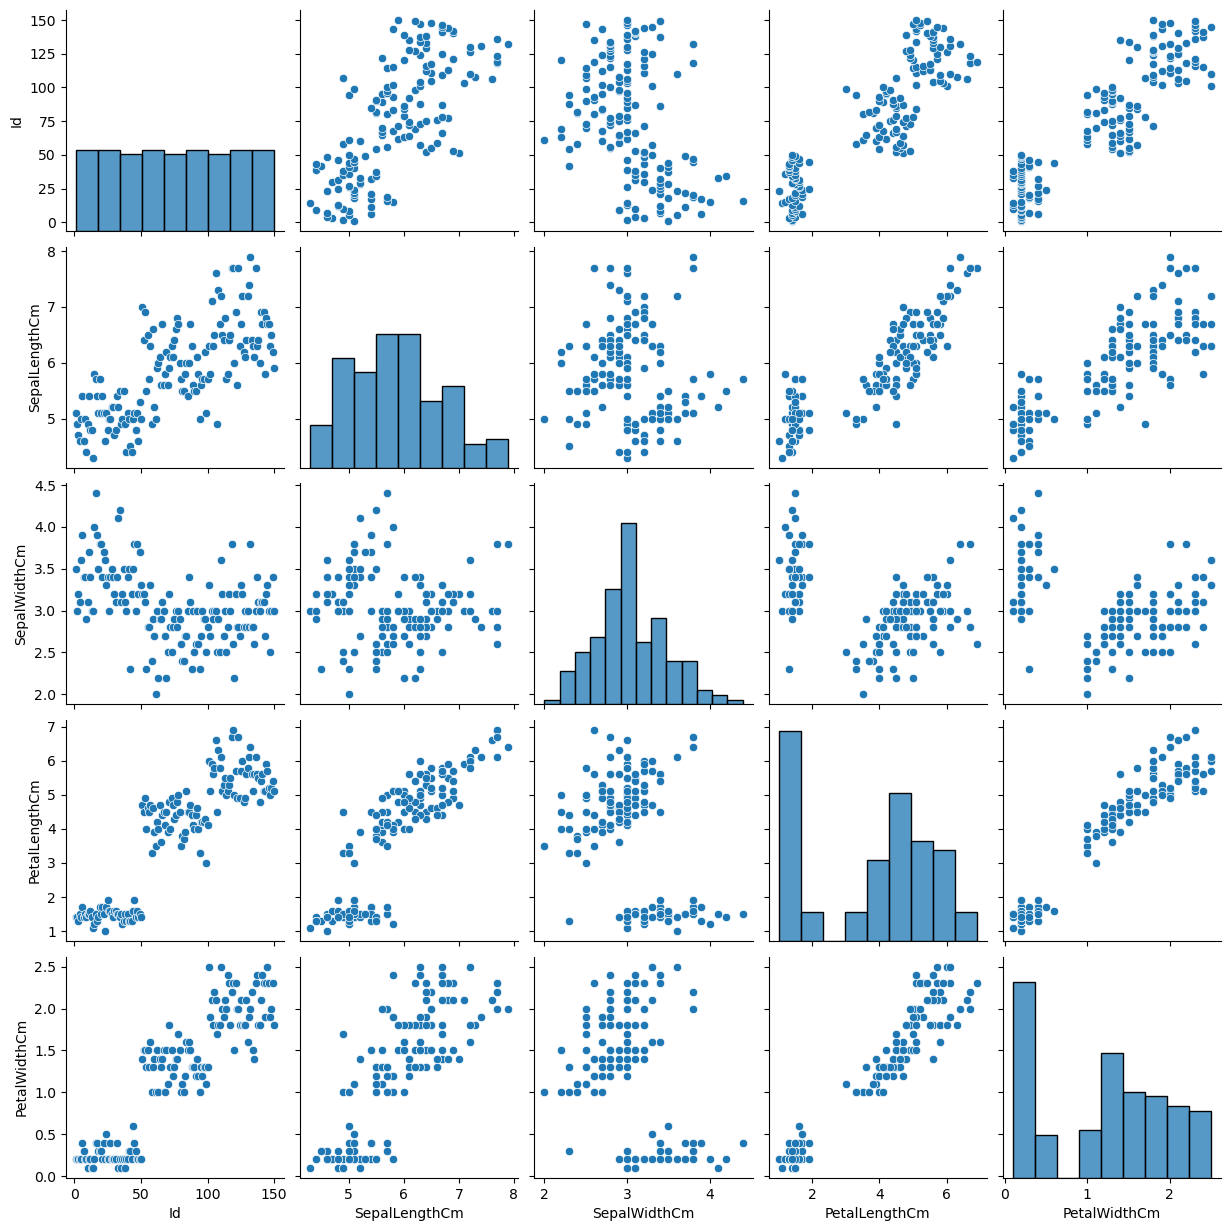

In [12]:
sns.pairplot(df)

<b>Some observations can be made here as follows:<b>
    <p>1. The id column actually contains the different types of Iris flowers sequentially, i.e the flowers 1 to 50 are one type, 51 to 100 another and so on.<br>2. It is clearly observed that Id column gives an clear distinction among the 3 types of flowers.</p>

<h3>Question 2:- Complete all basic data descriptive statistics by Species.</h3>

In [13]:
avg = df_new.groupby('Species').mean()
highest = df_new.groupby('Species').max()
lowest = df_new.groupby('Species').min()

print('AVERAGE PETAL/SEPAL DESC')
display(avg)
print('HIGHEST PETAL/SEPAL DESC')
display(highest)
print('LOWEST PETAL/SEPAL DESC')
display(lowest)

AVERAGE PETAL/SEPAL DESC


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.361702,4.976596,3.365957,1.46383,0.244681
Iris-versicolor,75.795918,5.955102,2.785714,4.27551,1.332653
Iris-virginica,125.500000,6.588000,2.974000,5.55200,2.026000


HIGHEST PETAL/SEPAL DESC


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.0,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.9,3.8,6.9,2.5


LOWEST PETAL/SEPAL DESC


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.2,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


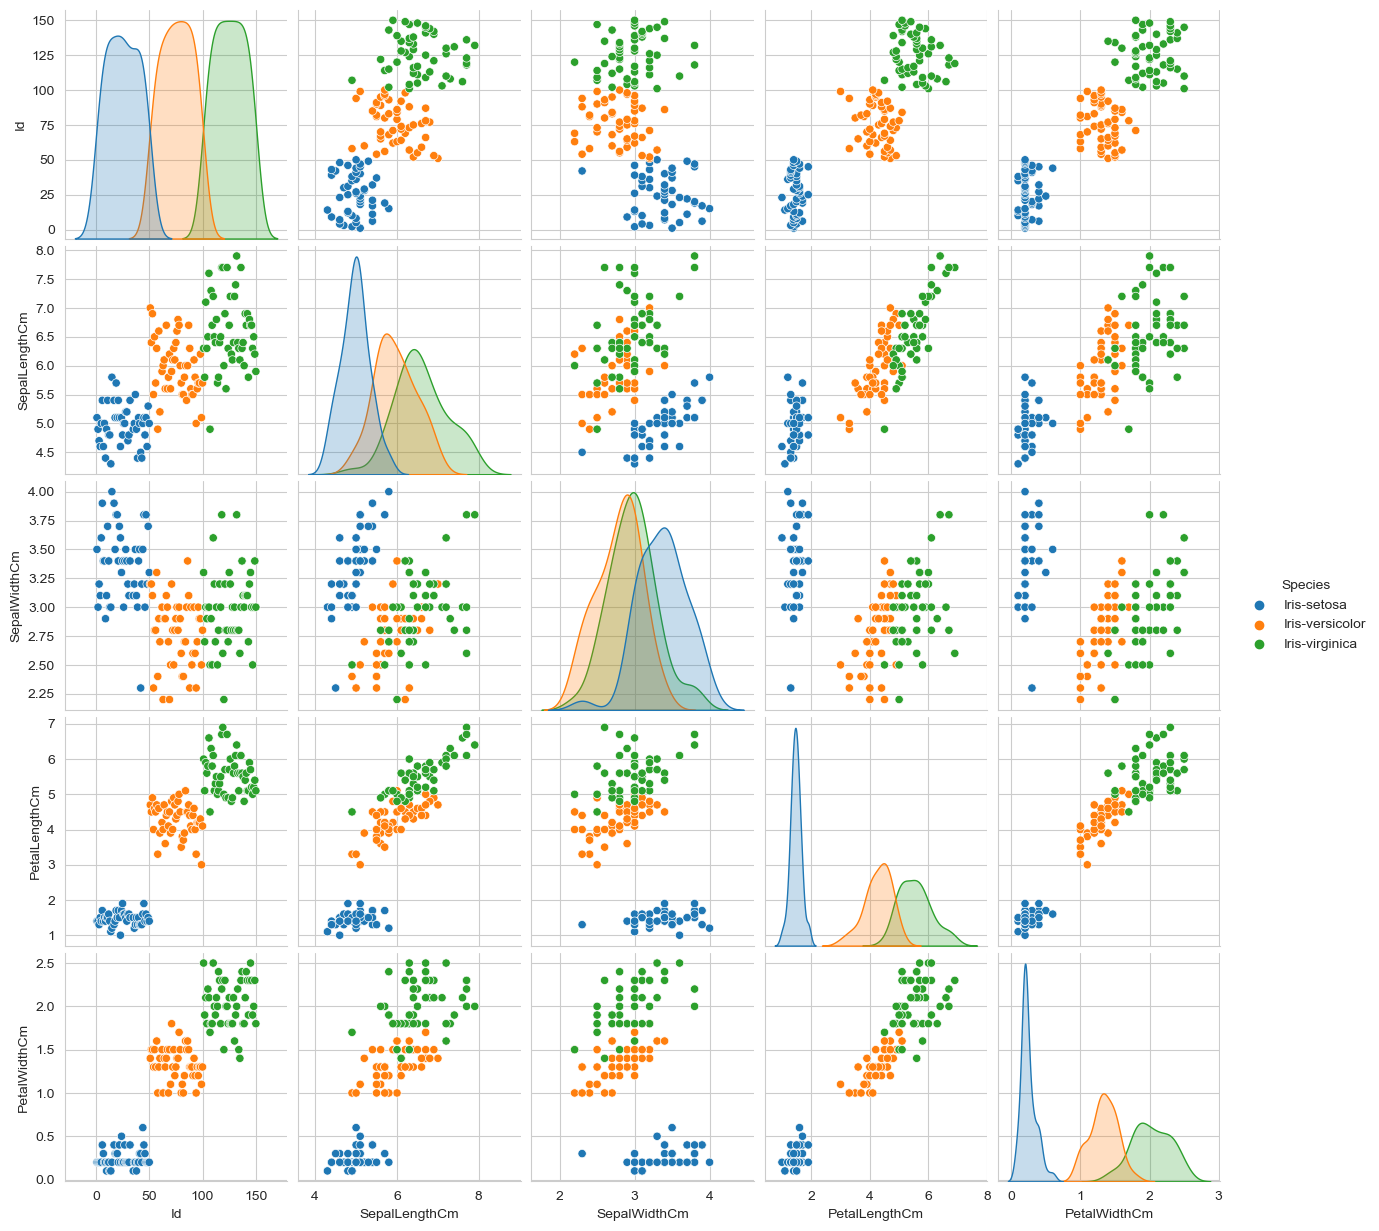

In [14]:
sns.set_style("whitegrid")
sns.pairplot(df_new,hue="Species");
plt.show()

<h3>Question 3:- Use the 'Sepal Length' , 'Sepal Width', 'Petal Length' and 'Petal Width' to find K-Means clusters.</h3>

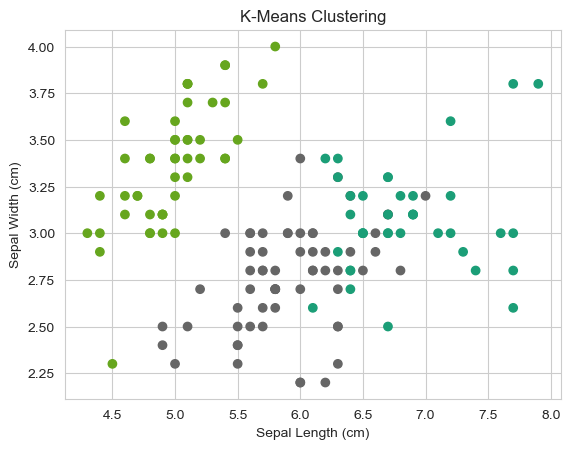

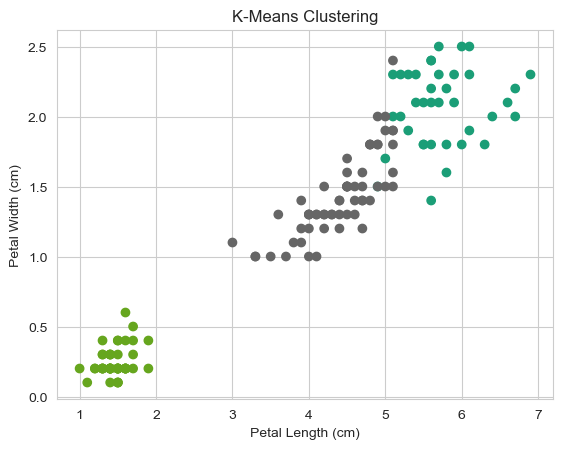

In [61]:
# Answer

df_new = pd.get_dummies(df_new)                                                    # One-Hot Encoding the Species column.

km = KMeans(n_clusters = 3, n_init = 25, random_state = 50)                        # Default Model for KMeans.

km.fit(df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) # Fitting the algorithm to the DataFrame.

clusterWCSS = km.inertia_                                                          # This is the total WCSS value.

clusterLabels = km.labels_

df_new['Cluster'] = clusterLabels                                                  # Add the cluster labels to DF for Viz.

plt.scatter(df_new['SepalLengthCm'], df_new['SepalWidthCm'], c=df_new['Cluster'], cmap='Dark2')  # Visualize the clusters.
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.show()


plt.scatter(df_new['PetalLengthCm'], df_new['PetalWidthCm'], c=df_new['Cluster'], cmap='Dark2')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering')
plt.show()

<h3>Question 4:- Find the optimum cluster number based on, elbow method, silhouette method and Calinski Harabasz Score.</h3>

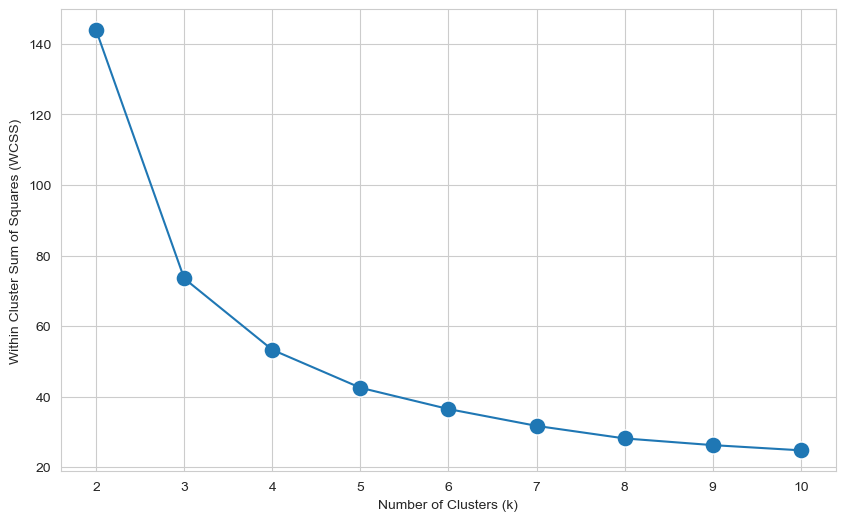

In [21]:
# Answer

# Using the Elbow Method.

wcss = []                                   # Empty list to store the Within Cluster Sum of Square values. 

for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 50)
    km.fit(df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(10, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', ylabel = 'Within Cluster Sum of Squares (WCSS)')b

<b> From this elbow curve we can observe that k = 3 is the best. </b>

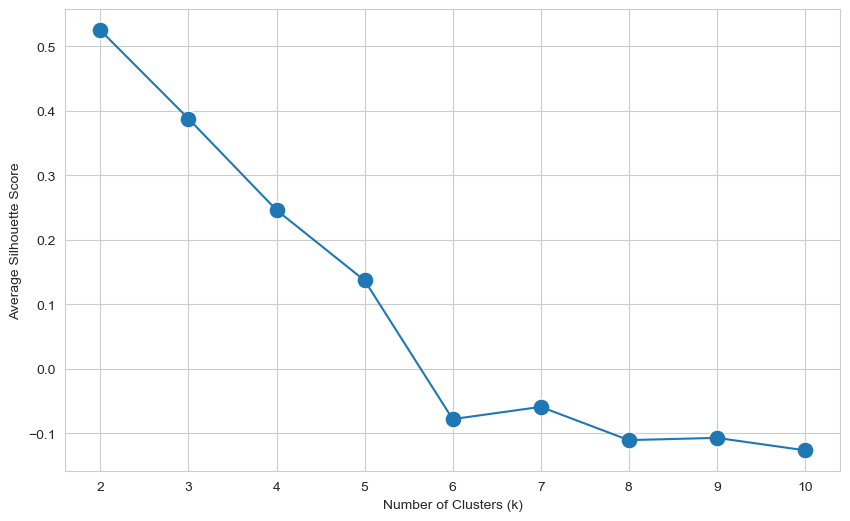

In [22]:
# Using the Silhoutte Method.

silhouette = []                             # Empty list to store the Silohoutte values.

for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 50)
    km.fit(df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    silhouette.append(silhouette_score(df_new, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(10, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', ylabel = 'Average Silhouette Score')

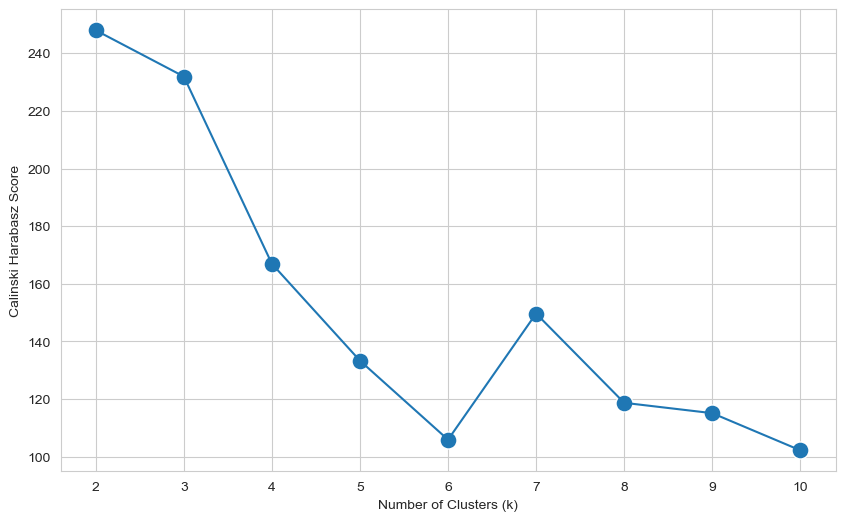

In [23]:
# Using the Calinski-Harabasz Method.

calinski = []                              # Empty list to store the CH values.

for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 50)
    km.fit(df_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    calinski.append(calinski_harabasz_score(df_new, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(10, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', ylabel = 'Calinski Harabasz Score')

<h3>Question 5:- Tabulate the proportion of each Species among the clusters found as a result of evaluation in task 4.</h3>

In [25]:
df_new

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica,Cluster
0,1,5.1,3.5,1.4,0.2,1,0,0,1
1,2,4.9,3.0,1.4,0.2,1,0,0,1
2,3,4.7,3.2,1.3,0.2,1,0,0,1
3,4,4.6,3.1,1.5,0.2,1,0,0,1
4,5,5.0,3.6,1.4,0.2,1,0,0,1
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1,0
146,147,6.3,2.5,5.0,1.9,0,0,1,2
147,148,6.5,3.0,5.2,2.0,0,0,1,0
148,149,6.2,3.4,5.4,2.3,0,0,1,0


In [35]:
species_counts = df_new.groupby('Cluster')[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']].sum()

# Calculate the proportion of each species in each cluster
proportions = species_counts.div(species_counts.sum(axis=1), axis=0)

# Print the proportions
print(proportions)

         Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
Cluster                                                                      
0                        0.0                 0.052632                0.947368
1                        1.0                 0.000000                0.000000
2                        0.0                 0.770492                0.229508


<h3>Question 6:- Share your insights on the data based on the clusters (Optional).</h3>

<b><p>
    1. The Cluster for Iris-Setose is very nicely done and it has all the flowers properly clustered. The flowers in this clusters are nowhere else.<br>
    2. The Cluster for Iris-Versicolor is about 78 % Proper clusters and some (about 23 %) of these flowers are clustered as Iris-Virinica.
    3. Similarly (vice-versa) the Iris-Virinice are clustered among Iris-Versicolor.<br>
    4. It was observed from CH Score and Silhoutte Score that the number of desired/optimum n_clusters is '2'. Which contradicts the observations from the Elbow method. This observation can be justified with the fact that 2 species are somewhat similar and they are difficult to cluster however one of the species is very easily distinguishable. This observation is reinforced by the actual photos of the flowers themselves given below.<br>
    5. We can observe from the photo below that the 'iris-setosa' is visually very distinguishable from the other 2.
    

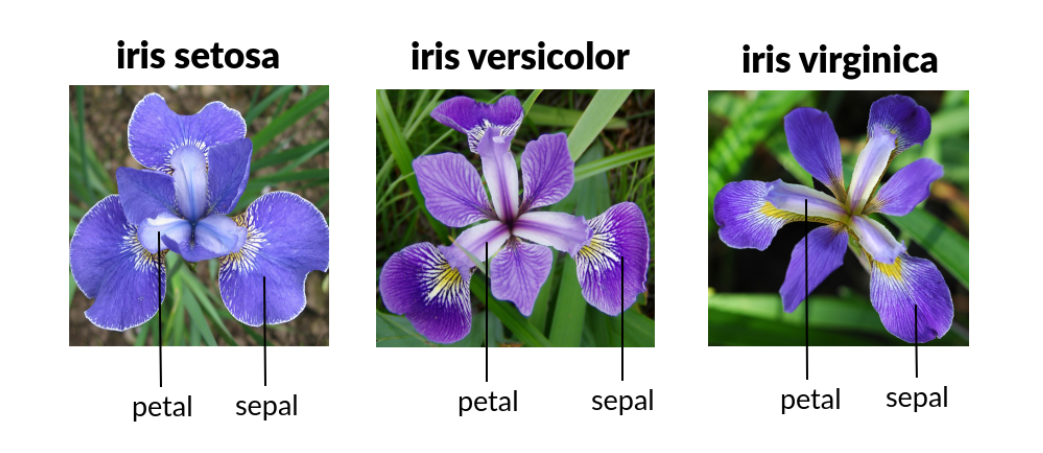